<a href="https://colab.research.google.com/github/ainejerry/sales-prediction/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

- Author:AINEMUKAMA ERNEST JERRY

## Project Overview

## Load and Inspect Data

In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading pandas
import pandas as pd
y='/content/drive/MyDrive/Colab Notebooks/sales_predictions_2023.csv'
df=pd.read_csv(y)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
#to get information about the data set provided
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
#to display the first five rows of the dataset
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data

In [ ]:
#duplicates in the data set
df.duplicated().sum()

0

In [ ]:
#to find the number of missing values in every column
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

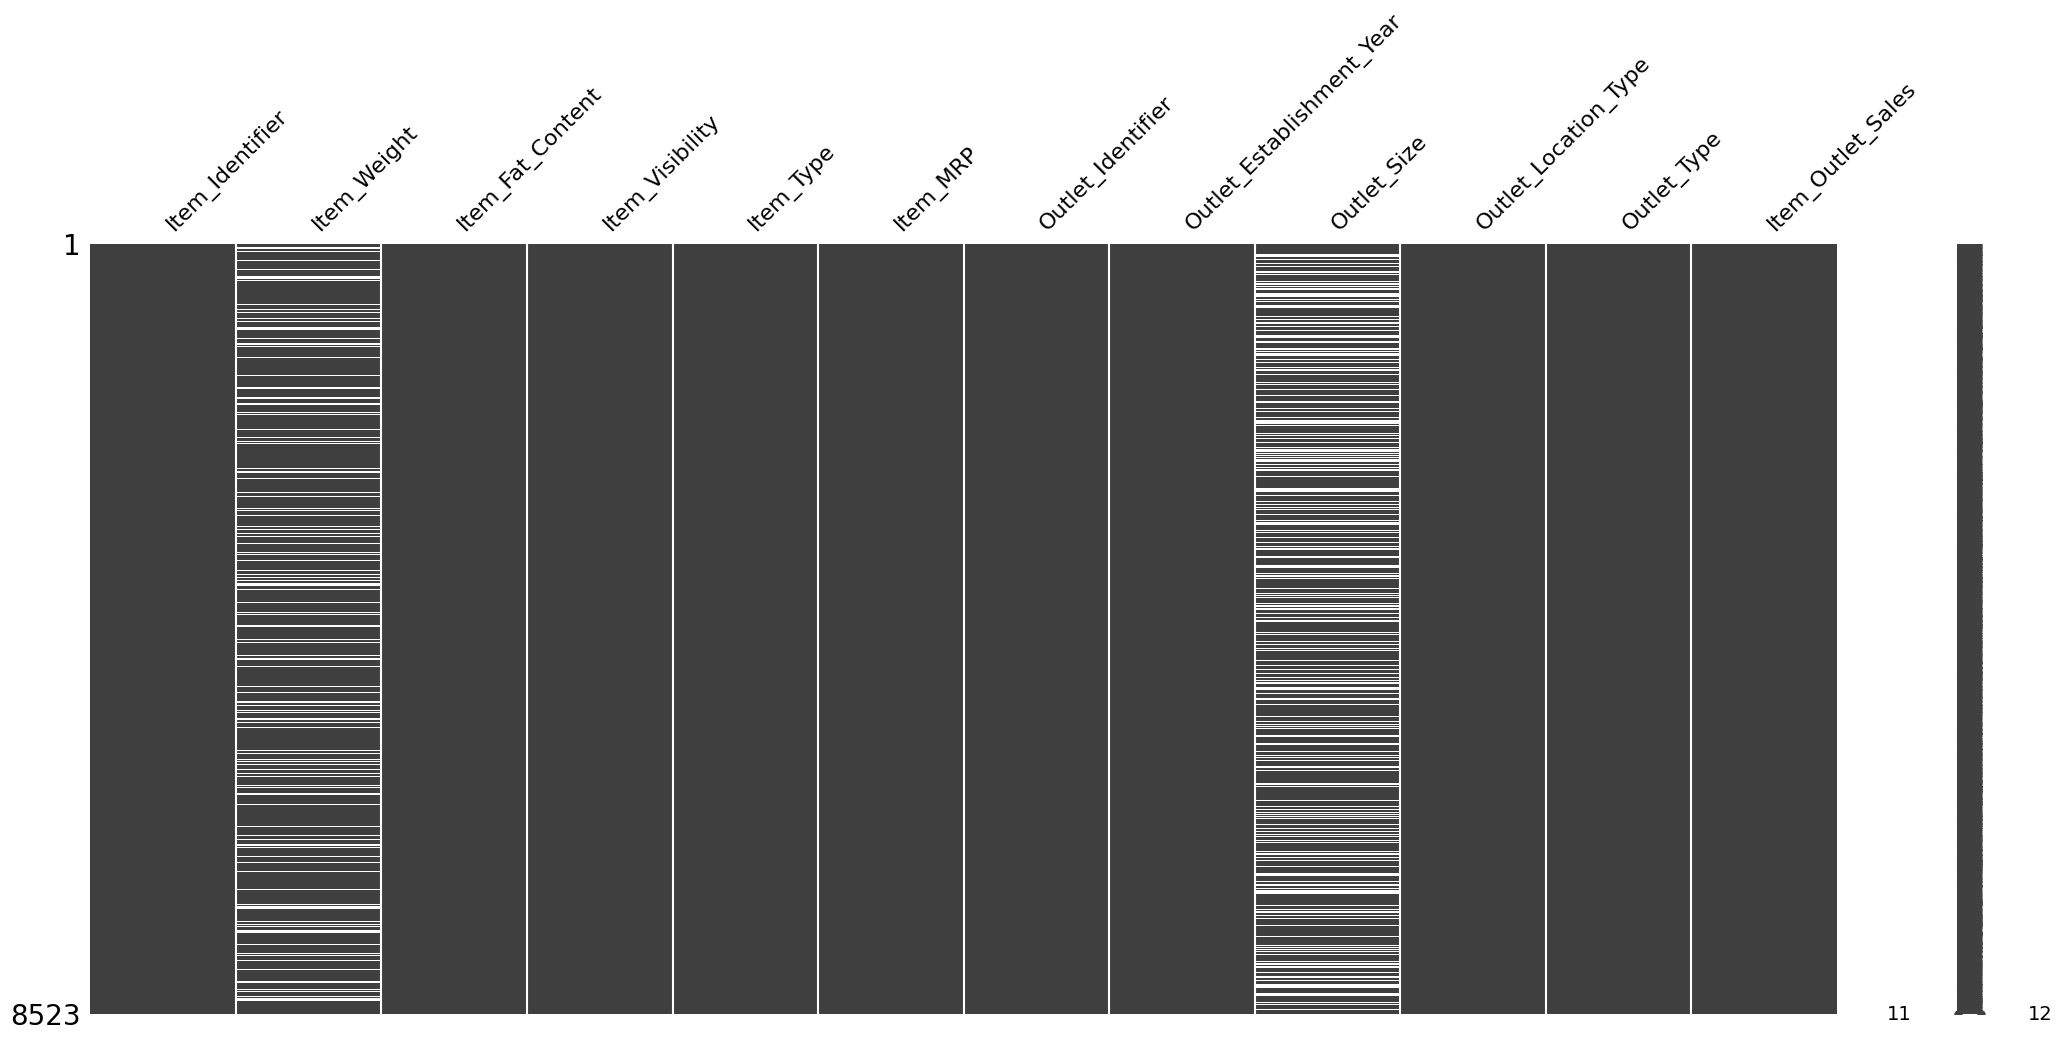

In [ ]:
#importing missingno to visualize the null values
import missingno as msno
msno.matrix(df);
#Item_Weight
#Outlet_Size

In [ ]:
#list of string columns
x=df.select_dtypes('object').columns
x

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
#to explore the consistency in the string columns
for y in x:
  print(df[y].value_counts())
#Item_Fat_Content

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
Medium    279

In [ ]:
#replacing LF with Low Fat
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('LF', 'Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5405
Regular    2889
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
#replacing low fat with Low Fat
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('low fat', 'Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [ ]:
#replacing reg with Regular
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
#to confirm the changes have been made
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
#make a list of numerical columns
num_cols = df.select_dtypes(include=[float, int])
num_cols

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [ ]:
#printing the min,max and mean of the numerical columns
print(num_cols.describe().loc[['min', 'max', 'mean']])

      Item_Weight  Item_Visibility    Item_MRP  Outlet_Establishment_Year  \
min      4.555000         0.000000   31.290000                1985.000000   
max     21.350000         0.328391  266.888400                2009.000000   
mean    12.857645         0.066132  140.992782                1997.831867   

      Item_Outlet_Sales  
min           33.290000  
max        13086.964800  
mean        2181.288914  


In [ ]:
#importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## Exploratory Data Analysis

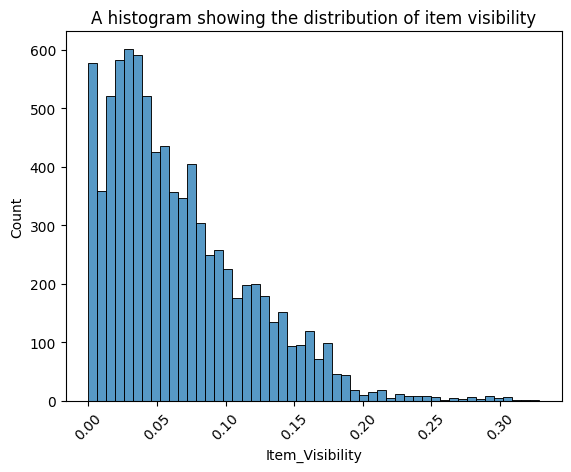

In [ ]:
#Histograms to view the distributions of numerical features in the dataset.
#histogram for item visibility
ax = sns.histplot(data=df, x="Item_Visibility")
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);
ax.set_title('A histogram showing the distribution of item visibility');

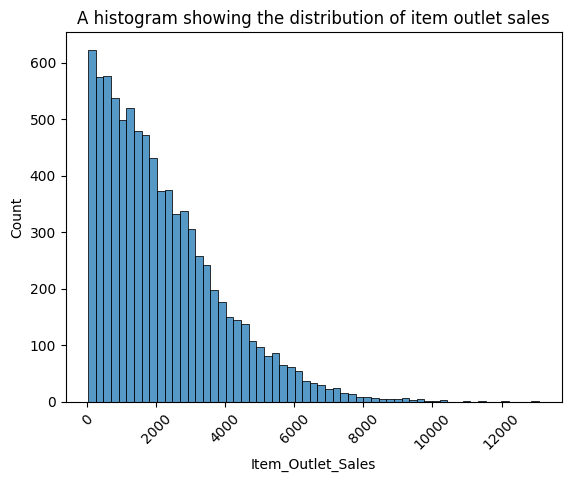

In [ ]:
#histogram for item outlet sales
ax = sns.histplot(data=df, x="Item_Outlet_Sales")
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);
ax.set_title('A histogram showing the distribution of item outlet sales');

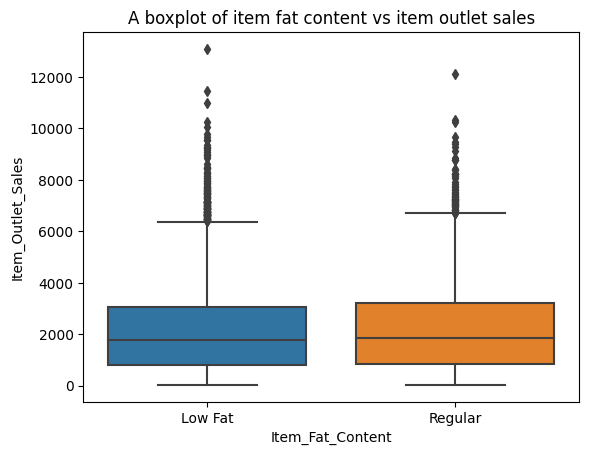

In [ ]:
#Boxplots to view statistical summaries of numerical features in the dataset.
#a boxplot of item fat content vs item outlet sales
ax = sns.boxplot(data=df, x='Item_Fat_Content',y='Item_Outlet_Sales')
ax.set_title('A boxplot of item fat content vs item outlet sales');

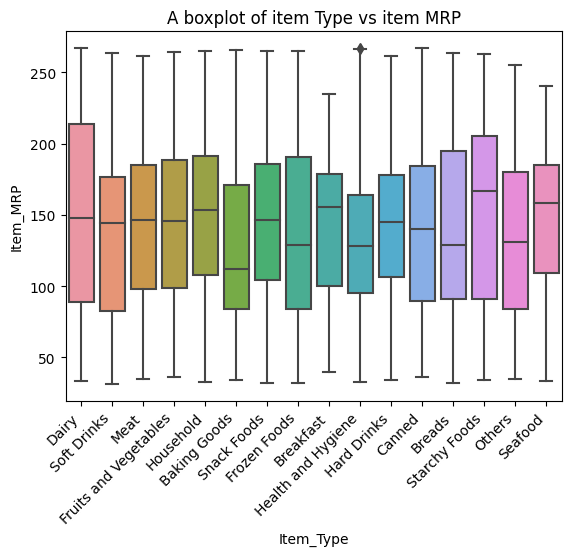

In [ ]:
#box plot of item type vs item mrp
ax = sns.boxplot(data=df, x='Item_Type',y='Item_MRP')
ax.set_title('A boxplot of item Type vs item MRP');
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right');

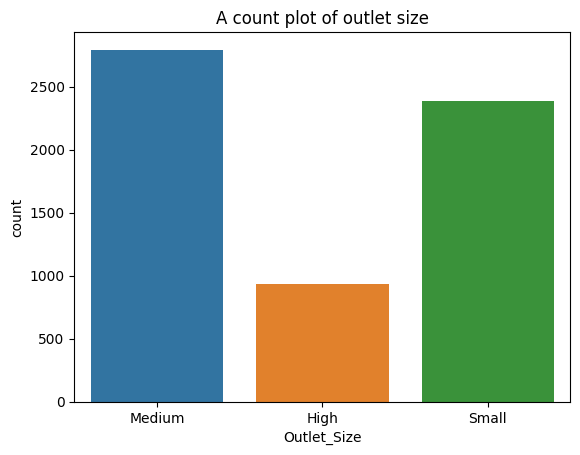

In [ ]:
#Countplots to view the frequency of each class of categorial features in the dataset.
#A count plot of outlet size
ax = sns.countplot(data=df, x='Outlet_Size')
ax.set_title('A count plot of outlet size');

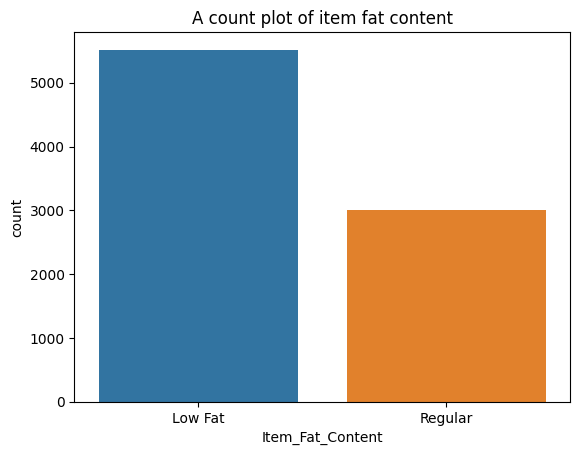

In [ ]:
#A count plot of item fat content
ax = sns.countplot(data=df, x='Item_Fat_Content')
ax.set_title('A count plot of item fat content');

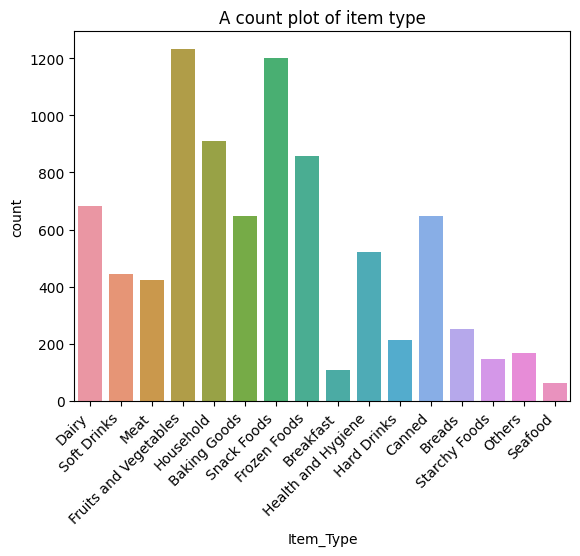

In [ ]:
#A count plot of item type
ax = sns.countplot(data=df, x='Item_Type')
ax.set_title('A count plot of item type');
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right');

In [ ]:
#Heatmap to view the correlation between features.
df_correlation=df.corr(numeric_only=True)
df_correlation


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


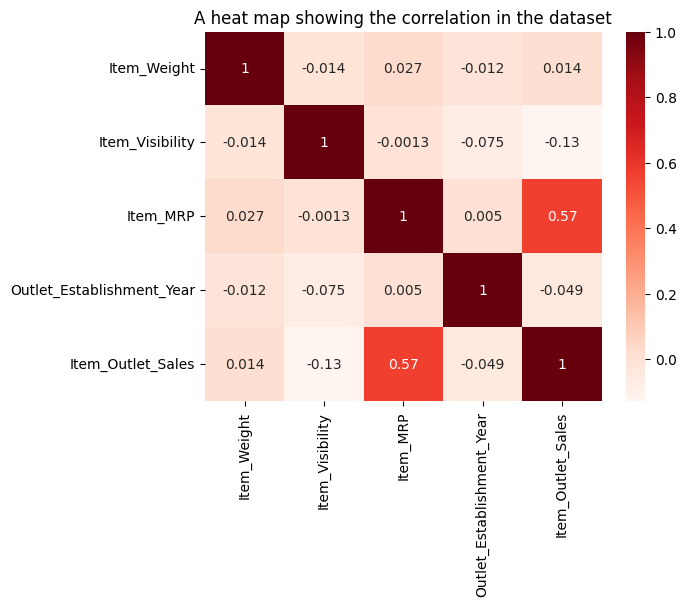

In [ ]:
ax=sns.heatmap(df_correlation , cmap ='Reds',annot=True);
ax.set_title('A heat map showing the correlation in the dataset');

## Feature Inspection

**Feature inspection;"Item_Fat_Content"**

--**items are either low fat or have regular fat**

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
def explore_cat(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Count plot of {x}")

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

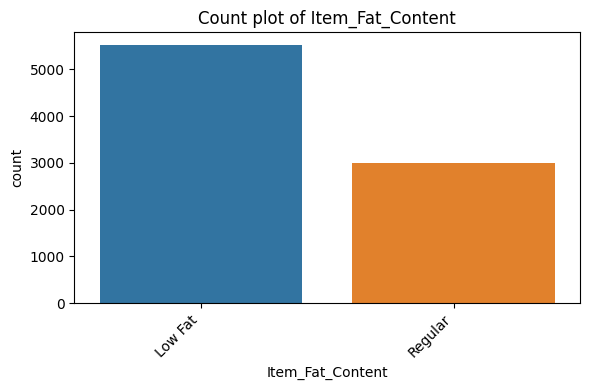

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [ ]:
explore_cat(df,x='Item_Fat_Content');

--What type of feature is it? (Categorical (nominal), ordinal, numeric)?
1. categorical(nominal)
--How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
1. NO NULL VALUES
--Is the feature constant or quasi-constant?
1. NO
--What is the cardinality? Is it high (>10)?
1.   No because we have only two characteristics of the item fat content column
--Would we know this feature before the target is determined?
1.   Yes
--Is there a business case/understanding reason to exclude based on our business case?
1.   No, because we see item fat content highly influences if an item is purchased or not









**Feature inspection;"Outlet_Size"-**

-- **outlets can be medium,small or big**

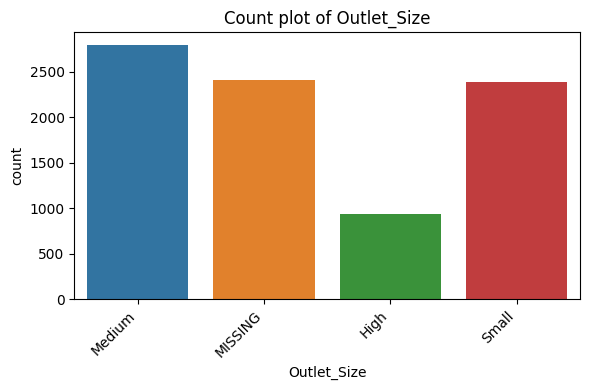

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [ ]:
#exploring the outlet size column
explore_cat(df,x='Outlet_Size');

--What type of feature is it? (Categorical (nominal), ordinal, numeric)?
1. categorical(nominal)
--How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
1. 2410 null values at 28.28% and i would drop the rows that have null values
--Is the feature constant or quasi-constant?
1. NO
--What is the cardinality? Is it high (>10)?
1.   No because we have only four characteristics of the item fat content column
--Would we know this feature before the target is determined?
1.   Yes
--Is there a business case/understanding reason to exclude based on our business case?
1.   yes, because the missing values are too many to give good insight into the data set

In [ ]:
def cat_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax



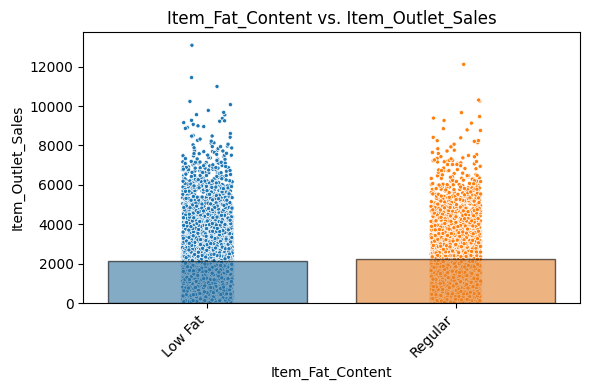

In [ ]:
cat_vs_target(df,x='Item_Fat_Content');

--Based on your business understanding, would you expect this feature to be a predictor of the target?


*   yes i believe the item fat content affects the item outlet sales as we see the item outlet sales for low fat content stretch to over 12000

--Does this feature appear to be a predictor of the target?

1. yes its predictor of the target because we get to understand that item fat content is considered as people purchase items




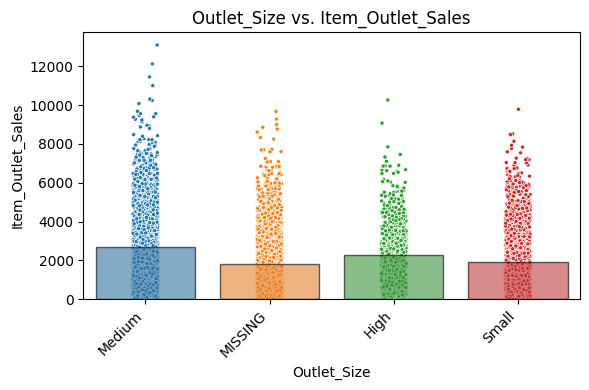

In [ ]:
cat_vs_target(df,x='Outlet_Size');

--Based on your business understanding, would you expect this feature to be a predictor of the target?


*  yes i would expect that the high outlet size is making more item outlet sales than what is being seen above

--Does this feature appear to be a predictor of the target?

1. no because there are too many missing values
2. we see the small outlet size competiting favourably with the medium and high outlet sizes

In [45]:
def ex_numeric(df, x, figsize=(6,5) ):
  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])
  ## Adding a title
  axes[0].set_title(f" A histogram of {x}")
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()
  ## Print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")



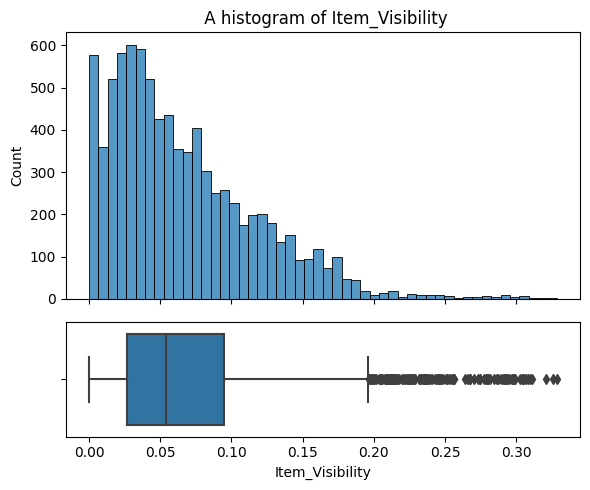

- NaN's Found: 0 (0.0%)


In [46]:
ex_numeric(df,x='Item_Visibility')

--What type of feature is it? (Categorical (nominal), ordinal, numeric)?
1. numeric
--How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
1. no null values
--Is the feature constant or quasi-constant?
1. NO
--What is the cardinality? Is it high (>10)?
1.   Not applicable (numeric feature).
--Would we know this feature before the target is determined?
1.   Yes
--Is there a business case/understanding reason to exclude based on our business case?
1.   no because its important to know how visible an item is to the consumers

In [ ]:
def num_vs_target(df, x, y='Item_Outlet_Sales', figsize=(6,4)):
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)
  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})")
  # Make sure the plot is shown before the print statement
  plt.show()
  return fig, ax

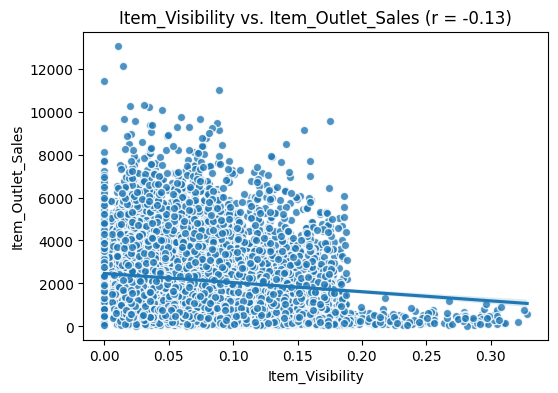

In [ ]:
num_vs_target(df,x='Item_Visibility');

--Based on your business understanding, would you expect this feature to be a predictor of the target?
*  yes because i expect that the more visible items have a high item outlet sales

--Does this feature appear to be a predictor of the target?
1. no because we see that the items with an item visibilty between 0 and 0.20 have more item outlet sales than those with a visibility higher than 0.20